In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [10]:
def create_random_matrix(rows, cols):
    return np.random.randint(0, 100, size=(rows, cols))

def euclidean_distance(point1, point2):
    squared_distance = sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2))
    return math.sqrt(squared_distance)

def k_n_n(data, query, k, distance_metric):
    distances = [(distance_metric(query, point), point) for point in data]
    distances.sort()
    return distances[:k]

In [11]:
matrix = create_random_matrix(9, 2)
print("Случайная матрица:")
print(matrix)
query_point = np.array([10, 22])
k = 3
print(f"{k} ближайших соседа для точки {query_point}:")
print(k_n_n(matrix, query_point, k, euclidean_distance))


Случайная матрица:
[[56 86]
 [82 31]
 [42 81]
 [76 50]
 [71 82]
 [57 97]
 [48 58]
 [85 36]
 [61 60]]
3 ближайших соседа для точки [10 22]:
[(52.3450093132096, array([48, 58])), (63.60031446463138, array([61, 60])), (67.11929677819934, array([42, 81]))]


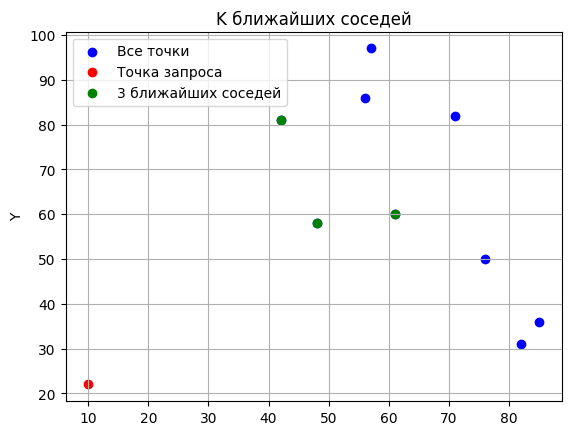

In [26]:
plt.scatter(matrix[:, 0], matrix[:, 1], color='blue', label='Все точки')
plt.scatter(query_point[0], query_point[1], color='red', label='Точка запроса')
nearest_neighbors = k_n_n(matrix, query_point, k, euclidean_distance)
neighbors_coords = [point for _, point in nearest_neighbors]  
plt.scatter([coord[0] for coord in neighbors_coords], [coord[1] for coord in neighbors_coords], color='green', label=f'{k} ближайших соседей')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K ближайших соседей')
plt.legend()
plt.grid(True)


Тестовая точка: [80.18038405017538, 4.727867192220514]
Предсказанная метка: 1


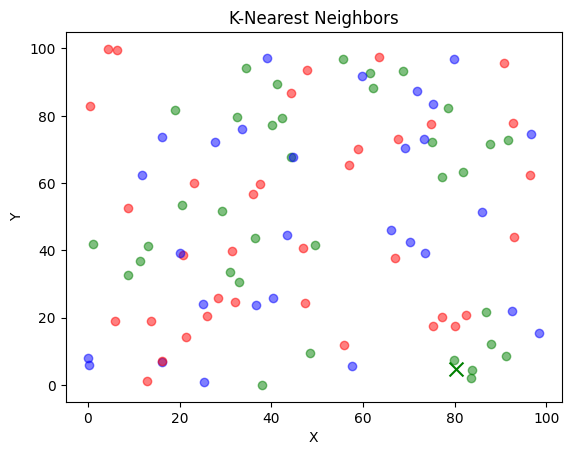

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
def generate_data(num_points, num_classes):
    data = []
    for i in range(num_points):
        x = random.uniform(0, 100)
        y = random.uniform(0, 100)
        label = random.randint(0, num_classes - 1)
        data.append([x, y, label])
    return data
def distance(point1, point2):
    return np.sqrt( (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
def knn(train_data, test_point, k):
    distances = []
    for data_point in train_data:
        dist = distance(data_point, test_point)
        distances.append((dist, data_point[2]))
    distances.sort()
    nearest_neighbors = distances[:k]
    labels = [neighbor[1] for neighbor in nearest_neighbors]
    most_common = Counter(labels).most_common(1)
    return most_common[0][0]
train_data = generate_data(100, 3)
test_point = [random.uniform(0, 100), random.uniform(0, 100)]
k = 5
predicted_label = knn(train_data, test_point, k)
print(f"Тестовая точка: {test_point}")
print(f"Предсказанная метка: {predicted_label}")
def plot_data(train_data, test_point, predicted_label):
    colors = ['r', 'g', 'b']
    for point in train_data:
        plt.scatter(point[0], point[1], color=colors[point[2]], alpha=0.5)
    plt.scatter(test_point[0], test_point[1], color=colors[predicted_label], marker='x', s=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('K-Nearest Neighbors')
    plt.show()
plot_data(train_data, test_point, predicted_label)